In [242]:
# PCA (Principal Component Analysis) in Python:

In [243]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [244]:
# Reading the dataset: # IRIS Dataset:

In [245]:
iris = pd.read_clipboard(sep = ',',header = None)

In [246]:
iris.columns = ["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width","Class"]

In [247]:
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [248]:
# Pre preprocessing, separating dependant and independent variables:

In [249]:
iris_x_original = iris.iloc[ :, :3]
iris_y_original = iris.iloc[:,4]

In [250]:
iris_x_original.head()

,Sepal_Length,Sepal_Width,Petal_Length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [251]:
# SK- Learn : Importing Sub Functions:

from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) 

from sklearn.preprocessing import StandardScaler


In [252]:
#Standardising the data:

sc = StandardScaler()

iris_x = sc.fit_transform(iris_x_original)

In [253]:
iris_x[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 ],
       [-1.14301691, -0.1249576 , -1.3412724 ],
       [-1.38535265,  0.33784833, -1.39813811],
       [-1.50652052,  0.10644536, -1.2844067 ],
       [-1.02184904,  1.26346019, -1.3412724 ]])

In [254]:
# Getting Covariance using NUmpy:

Cov_mat = np.cov(iris_x.T)

Cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486],
       [-0.11010327,  1.00671141, -0.42333835],
       [ 0.87760486, -0.42333835,  1.00671141]])

In [256]:
# Converting Back into a DataFrame

iris_x_df = pd.DataFrame(iris_x, columns = iris_x_original.columns)
iris_x_df.head()

,Sepal_Length,Sepal_Width,Petal_Length
0,-0.900681,1.032057,-1.341272
1,-1.143017,-0.124958,-1.341272
2,-1.385353,0.337848,-1.398138
3,-1.506521,0.106445,-1.284407
4,-1.021849,1.263460,-1.341272


In [257]:
# Getting the Correlation:  Observe that Coorelation matrix yields te same result as CoVariance matrix for Standardised Arrays
iris_x_df.corr()

,Sepal_Length,Sepal_Width,Petal_Length
Sepal_Length,1.000000,-0.109369,0.871754
Sepal_Width,-0.109369,1.000000,-0.420516
Petal_Length,0.871754,-0.420516,1.000000


In [277]:
# Applying PCA:

In [278]:
from sklearn.decomposition import PCA

pca = PCA()

pca_model = pca.fit(iris_x)

pca_model

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [260]:
pca_model.n_components_

3

In [261]:
# Getting the Variance Explained by each of the Principal Component, this might also be equal to the Eigen Value-

pca_model.explained_variance_

array([2.02734192, 0.92097052, 0.07182178])

In [262]:
pca_model.explained_variance_ratio_

# Getting the Eigen Vectors:
pca_model.components_

array([[ 0.63137983, -0.35424227,  0.6898347 ],
       [ 0.42771052,  0.90110216,  0.07126444],
       [-0.64685642,  0.25005463,  0.72045087]])

In [263]:
# Comparison with Numpy method to get EigenValue and EigenVectors: THis is not to be remembered or learnet: Too Statistical
np.linalg.eig(Cov_mat)

(array([2.02734192, 0.07182178, 0.92097052]),
 array([[-0.63137983,  0.64685642,  0.42771052],
        [ 0.35424227, -0.25005463,  0.90110216],
        [-0.6898347 , -0.72045087,  0.07126444]]))

Text(0,0.5,'Explained Variance Ratio')

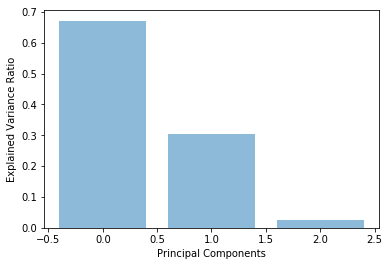

In [264]:
plt.bar(range(3),pca_model.explained_variance_ratio_, alpha = 0.5, align = 'center')
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")


In [265]:
pca_model.explained_variance_ratio_

array([0.67127544, 0.30494357, 0.02378099])

In [266]:
# As we can see the first 2 components, explain 95% of the variance in Data, So we can ignore the 3rd PC.
# Also the getting the new Dataset with PC1, PC2 and Class Variales. This dataset can further be used for Modelling.

In [267]:
iris_y_original.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Class, dtype: object

In [274]:
pca2 = PCA(n_components =2)

pca_model2 = pca2.fit(iris_x)

pd.DataFrame(pca_model2)

np.array(pca_model2)




ValueError: DataFrame constructor not properly called!

In [275]:
pd.read_csv(pca_model2)

ValueError: Invalid file path or buffer object type: <class 'sklearn.decomposition.pca.PCA'>